In [1]:
import numpy as np
import pandas as pd

from money_parser import price_dec
import lightgbm as lgbm

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, make_scorer

pd.options.display.max_columns = None

In [107]:
df_test3 = pd.read_csv('df_test3.csv', index_col='id')
df_test3

,price,host_response_rate,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,accommodates,bathrooms,bedrooms,beds,Latitude,Longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3647,150.0,0,42220.0,8831.0,37019.0,7619.0,25.6,50.1,42.3,13.7,30.4,3.5,10.1,8.8,2.1,70.8,7.1,4.9,6.3,36.4,2695.0,78.7,11.1,10.2,0.0,11.0,2,1.0,1.0,1.0,40.809020,-73.941256
3831,89.0,92,77039.0,8111.0,36598.0,4034.0,19.0,19.7,55.3,13.9,21.7,4.8,4.4,13.4,0.0,64.4,10.6,5.5,6.1,39.8,2000.0,82.6,11.9,5.5,0.0,11.8,3,1.0,1.0,4.0,40.685779,-73.960251
5022,80.0,0,25581.0,3819.0,20311.0,4797.0,33.2,47.1,32.2,27.1,27.0,1.4,12.3,14.5,2.6,70.3,8.8,1.7,2.1,36.6,2946.0,84.0,14.1,1.9,0.0,9.6,1,1.0,NaN,1.0,40.799598,-73.945477
5099,200.0,78,120205.0,12734.0,93503.0,10726.0,7.6,0.0,64.5,4.4,27.5,3.2,0.4,2.5,0.4,41.7,43.7,5.6,6.1,29.6,5491.0,92.1,3.6,4.2,0.0,6.9,2,1.0,1.0,1.0,40.746834,-73.974497
5121,60.0,0,51645.0,13885.0,32422.0,4716.0,19.3,26.3,54.0,13.4,20.3,1.8,10.5,10.2,1.4,67.7,4.4,8.4,7.7,37.5,2143.0,86.0,9.8,4.2,0.0,8.0,2,NaN,1.0,1.0,40.684648,-73.957085
5178,79.0,90,81974.0,18456.0,64861.0,8324.0,14.5,0.0,67.0,11.3,19.0,0.6,2.2,4.0,0.4,50.5,35.4,6.4,3.3,25.3,3261.0,88.3,5.2,6.4,0.0,7.9,2,1.0,1.0,1.0,40.764925,-73.987161
5203,79.0,0,117045.0,25802.0,71348.0,9226.0,12.3,4.8,74.2,8.2,13.3,1.7,2.6,6.0,1.0,76.0,7.3,2.2,7.5,37.2,4306.0,81.8,6.9,10.7,0.6,6.6,1,1.0,1.0,1.0,40.803819,-73.970382
5222,116.0,100,67166.0,9630.0,59917.0,7958.0,24.1,44.9,69.2,9.4,19.6,0.4,1.3,4.7,0.0,55.5,25.5,8.3,6.0,30.0,4480.0,86.9,4.9,7.9,0.4,5.1,2,1.0,1.0,1.0,40.729497,-73.981357
5238,150.0,100,19863.0,5878.0,12802.0,2656.0,44.7,55.3,18.3,32.5,35.5,4.6,9.1,14.3,3.2,37.0,37.6,5.1,2.9,30.3,4028.0,85.0,10.2,4.8,0.0,8.7,3,1.0,1.0,2.0,40.710276,-73.989799


In [109]:
df_test4 = df_test3.copy()

In [110]:
df_test4.dtypes

price                 float64
host_response_rate      int64
Income                float64
IncomeErr             float64
IncomePerCap          float64
IncomePerCapErr       float64
Poverty               float64
ChildPoverty          float64
Professional          float64
Service               float64
Office                float64
Construction          float64
Production            float64
Drive                 float64
Carpool               float64
Transit               float64
Walk                  float64
OtherTransp           float64
WorkAtHome            float64
MeanCommute           float64
Employed              float64
PrivateWork           float64
PublicWork            float64
SelfEmployed          float64
FamilyWork            float64
Unemployment          float64
accommodates            int64
bathrooms             float64
bedrooms              float64
beds                  float64
Latitude              float64
Longitude             float64
dtype: object

In [111]:
corr = df_test4.corr()['price']
corr = corr.sort_values()
corr

MeanCommute          -0.200680
Service              -0.183853
Production           -0.166297
Longitude            -0.142318
Construction         -0.137631
ChildPoverty         -0.125898
Unemployment         -0.123782
Poverty              -0.123236
PublicWork           -0.121789
Transit              -0.118416
Drive                -0.112470
Carpool              -0.089671
Office               -0.043056
FamilyWork           -0.002099
host_response_rate    0.002728
Latitude              0.033920
SelfEmployed          0.043821
Employed              0.084326
WorkAtHome            0.087831
PrivateWork           0.094479
OtherTransp           0.122960
IncomeErr             0.132982
Walk                  0.174453
Income                0.185953
Professional          0.190552
bathrooms             0.202590
IncomePerCapErr       0.203745
IncomePerCap          0.222013
beds                  0.230135
bedrooms              0.235247
accommodates          0.313267
price                 1.000000
Name: pr

In [112]:
df_test5 = df_test4.copy()

In [113]:
df_test5 = df_test5.drop(['IncomeErr','IncomePerCapErr','WorkAtHome','Employed','PrivateWork','Poverty','Transit','FamilyWork'],axis=1)

In [115]:
X = df_test5.drop('price', axis='columns').values
y = df_test5['price'].values

const_params = {
    'objective':                      'regression', 
    'metric':                         'rmse',
    'n_jobs':                         -1
}

tuning_parameters = {
    'learning_rate':                  [0.11, 0.115, 0.12], 
    'max_depth':                      [20], 
    'n_estimators':                   [275, 280, 285], 
    'random_state':                   [0]
}

def rmse(y_true, y_pred): return abs(np.sqrt(mean_squared_error(y_true, y_pred)))
scorer = make_scorer(rmse, greater_is_better=False)

grid = GridSearchCV(lgbm.LGBMRegressor(**const_params), 
                    tuning_parameters, 
                    cv=StratifiedKFold(5), 
                    scoring=scorer, 
                    n_jobs=-1)

grid.fit(X, y)

print(f'Best parameters {grid.best_params_}.')
print(f'Best RMSE is {-1*grid.best_score_}.')

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters {'learning_rate': 0.11, 'max_depth': 20, 'n_estimators': 275, 'random_state': 0}.
Best RMSE is 127.93843221459643.


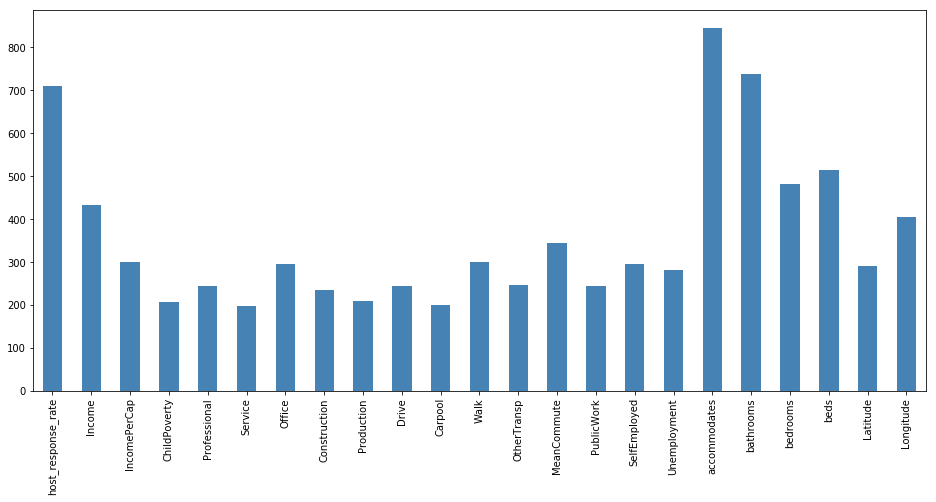

In [105]:
(pd.Series(grid.best_estimator_.feature_importances_, 
           index=df_test5.drop('price', axis='columns').columns.tolist())
 .plot.bar(color='steelblue', figsize=(16, 7)));